# GramWorks Assignment - Rohan Mathur

### Here is the link below for the site we will be used to scrape

In [1]:
link1 = "https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=78&Tx_State=KK&Tx_District=0&Tx_Market=0&DateFrom=01-Jan-2015&DateTo=01-Feb-2021&Fr_Date=01-Jan-2015&To_Date=01-Feb-2021&Tx_Trend=0&Tx_CommodityHead=Tomato&Tx_StateHead=Karnataka&Tx_DistrictHead=--Select--&Tx_MarketHead=--Select--"

#### First & foremost , we are going to import all the necessary libraries that are needed for this Python Notebook. This particular notebook will include only the scraping part & the EDA & Insight Generation Along with Communication

In [2]:
from bs4 import BeautifulSoup  # For scraping
import requests                # For handling web requests


import pandas as pd            # For creating , making & handling our dataset 
import datetime

from selenium import webdriver                             # For help in web scraping
from selenium.webdriver.support.ui import WebDriverWait    

import matplotlib.pyplot as plt                            # Matplotlib & Seaborn for creating insights & visualizations
import seaborn as sns

In [3]:
def get_url(link):
    
    URL  = link               # Get URL
    page = requests.get(URL)  # Send URL Request
    
    return page

page = get_url(link1)

# To Get Headers


For this , with help of BeeautifulSoup , we have identified the tag for the headers & put it in our function & extracted the text

In [7]:
soup    = BeautifulSoup(page.content, 'html.parser')
table1  = soup.find('table' , attrs = {'class':'tableagmark_new'})   # According to Inspect Source Element

def get_headers(page , table):
    
 
    header  = table1.findAll('th')                                       # Tag for Headers
    headers = [ th.text for th in header ]                               # Extract text from the tag
    return headers

headers = get_headers(page , table1)
headers

['Sl no.',
 'District Name',
 'Market Name',
 'Commodity',
 'Variety',
 'Grade',
 'Min Price (Rs./Quintal)',
 'Max Price (Rs./Quintal)',
 'Modal Price (Rs./Quintal)',
 'Price Date']

 Now , to get text from the tables, we find the right tag & put it in our findAll parameter

In [8]:
def get_tables(table1):
    
    table     = table1.findAll('span')   # Correct tag for getting info for table rows
    table_list = []
    
    for data in table:
        
        table_list.append(data.text)     # Append all the data for now to an empty list for parsing later
        
    return table_list

table_list = get_tables(table1)
table_list

['Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1000',
 '1000',
 '1000',
 '09 Dec 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1000',
 '1000',
 '1000',
 '20 Nov 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '750',
 '750',
 '750',
 '07 Apr 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1500',
 '1500',
 '1500',
 '12 Mar 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1500',
 '1500',
 '1500',
 '06 Mar 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '800',
 '1500',
 '800',
 '24 Feb 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '2000',
 '2000',
 '2000',
 '11 Feb 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1000',
 '1000',
 '1000',
 '30 Jan 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '800',
 '800',
 '800',
 '28 Jan 2020',
 'Hassan',
 'Arasikere',
 'Tomato',
 'Tomato',
 'FAQ',
 '1000',
 '1000',
 '1000',
 '21 Jan 2020',
 'Hassan',
 'Arasikere',
 'T

In [9]:
len(table_list)

450

We have 50 rows for each table in our web page & 10 columns that means we should be having 450 entries in our list & that is what we have , hence it is correct.

### Now , we create our initial dataframe with the data we have by parsing through it and using Pandas library

In [10]:
df = pd.DataFrame(columns=headers)

In [11]:
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [15]:
df.drop(columns = 'Sl no.' , inplace = True)

In [16]:
def append_to_dataframe(df , table_list):
    factor = 9                      # For each 9th entry , we pick up those 10 values & enter as row 1
    count  = 0                      # For count of each row             
    
    for rows in range(0,50):

        row = table_list[count:factor]
        
        #row.insert(0,s_no) 
        
        count  += 9
        factor += 9

        numbered_row = pd.Series(row, index = df.columns)    # Append the row to the Pandas DataFrame 
        df = df.append(numbered_row, ignore_index=True)      # Appending
        
    return df 

df = append_to_dataframe(df  , table_list)

In [17]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,09 Dec 2020
1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,20 Nov 2020
2,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,07 Apr 2020
3,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,12 Mar 2020
4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,06 Mar 2020
5,Hassan,Arasikere,Tomato,Tomato,FAQ,800,1500,800,24 Feb 2020
6,Hassan,Arasikere,Tomato,Tomato,FAQ,2000,2000,2000,11 Feb 2020
7,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,30 Jan 2020
8,Hassan,Arasikere,Tomato,Tomato,FAQ,800,800,800,28 Jan 2020
9,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,21 Jan 2020


### Here is where I reached a issue. I wasn't able to scrape for each table till the end of the data for the given condition because of reasons stated -

 1) The URL for the site wasn't changing when I clicked the next button for obtaining the next table containing 51-100 columns.

2) If the URL would have changed , I would have easily used the offset parameter to change links everytime I extract the entries for each table. However this wasn't the case & I tried using Selenium below. You can see the errors I faced (for reference) & didn't spend much time on it rectifying as I am confident I could do the rest of the tasks.

 3) For getting the whole data , I downloaded it from the site & was able to convert that into a csv file successfully. Here on , I have used that csv which contains approx 35,000 row entries for the condition stated in the task

In [18]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [19]:
from selenium import webdriver

driver_path = "C:\Windows\chromedriver.exe"
brave_path = "C:/Program Files/BraveSoftware/Brave-Browser/Application/brave.exe"

option = webdriver.ChromeOptions()
option.binary_location = brave_path
# option.add_argument("--incognito") OPTIONAL
# option.add_argument("--headless") OPTIONAL

# Create new Instance of Chrome
browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)

browser.get("https://www.google.")

<ipython-input-19-21d59d091dbe>:12: DeprecationWarning: use options instead of chrome_options
  browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)


WebDriverException: Message: unknown error: net::ERR_NAME_NOT_RESOLVED
  (Session info: chrome=89.0.4389.72)


In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
url = "https://agmarknet.gov.in/SearchCmmMkt.aspx?Tx_Commodity=78&Tx_State=KK&Tx_District=0&Tx_Market=0&DateFrom=01-Jan-2015&DateTo=01-Feb-2021&Fr_Date=01-Jan-2015&To_Date=01-Feb-2021&Tx_Trend=0&Tx_CommodityHead=Tomato&Tx_StateHead=Karnataka&Tx_DistrictHead=--Select--&Tx_MarketHead=--Select--"
browser = webdriver.Chrome(executable_path=driver_path, chrome_options=option)
browser.get(url)
###### Wait until you see some element that signals the page is completely loaded
WebDriverWait(browser, timeout=10)

############## do your things with the first page
#content =  browser.page_source.encode('ascii','ignore').decode("utf-8")


#### Now if you are sure there is next page
next_button_class = "javascript:__doPostBack('ctl00$cphBody$GridPriceData" ###here insert the class of 'next button'
browser.find_element_by_class_name(next_button_class).click()
time.sleep(3)

###### Wait until you see some element that signals the page is completely loaded
WebDriverWait(browser, timeout=10).until(lambda x: x.find_element_by_class_name('Even'))

content =  browser.page_source.encode('ascii','ignore').decode("utf-8")

Here is where I have started using the downloaded csv

In [20]:
dataframe = pd.read_csv(r'C:\Users\Rohan\Projects\Gramworks\agri_data.csv')

In [21]:
dataframe.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,09-Dec-20
1,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,20-Nov-20
2,3,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,07-Apr-20
3,4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,12-Mar-20
4,5,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,06-Mar-20


In [22]:
dataframe.shape

(35544, 10)

In [23]:
dataframe.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [24]:
dataframe.drop(columns = "Sl no.", inplace = True)

In [25]:
dataframe.shape

(35544, 9)

In [26]:
dataframe.isnull().count()

District Name                35544
Market Name                  35544
Commodity                    35544
Variety                      35544
Grade                        35544
Min Price (Rs./Quintal)      35544
Max Price (Rs./Quintal)      35544
Modal Price (Rs./Quintal)    35544
Price Date                   35544
dtype: int64

In [27]:
dataframe.dropna(inplace = True)

In [28]:
dataframe.shape

(35544, 9)

No null values existed in our database.

In [29]:
dataframe.dtypes

District Name                object
Market Name                  object
Commodity                    object
Variety                      object
Grade                        object
Min Price (Rs./Quintal)       int64
Max Price (Rs./Quintal)       int64
Modal Price (Rs./Quintal)     int64
Price Date                   object
dtype: object

Let us change the dataframe column names to make it easier for accessing

In [30]:
new_col_names = ['District_Name', 'Market_Name', 'Commodity', 'Variety','Grade',
                'Min_Price','Max_Price','Modal_Price','Price_Date']
dataframe.columns = new_col_names
dataframe.head()

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,09-Dec-20
1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,20-Nov-20
2,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,07-Apr-20
3,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,12-Mar-20
4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,06-Mar-20


The names have been changed now.

Now, we need to verify the column types for each column & see if they are compatible with our dataframe for further use

In [31]:
dataframe.Price_Date.unique()

array(['09-Dec-20', '20-Nov-20', '07-Apr-20', ..., '12-Jul-15',
       '30-Jan-16', '26-Jun-19'], dtype=object)

In [32]:
dataframe.dtypes

District_Name    object
Market_Name      object
Commodity        object
Variety          object
Grade            object
Min_Price         int64
Max_Price         int64
Modal_Price       int64
Price_Date       object
dtype: object

As we see, the first 5 columns are string type, the prices columns are in int type & lastly, the Price_date is also in the string type.

Let us change the Date to --> Datetype 

In [33]:
dates= dataframe['Price_Date'] 

Now, we need to convert the "Year" of each entry to YYYY format so it can be easily read by the datetime library which we will use to convert it.

In [34]:
updated_date = []

for date in dates:
    
    new_date = date[0:7] + "20" + date[7:]
    updated_date.append(new_date)

In [35]:
updated_date[1:10]

['20-Nov-2020',
 '07-Apr-2020',
 '12-Mar-2020',
 '06-Mar-2020',
 '24-Feb-2020',
 '11-Feb-2020',
 '30-Jan-2020',
 '28-Jan-2020',
 '21-Jan-2020']

Now since that is done , we can move on to converting our date type

In [36]:
converted_dates = []

for date in updated_date:
    
    new_date = datetime.datetime.strptime(date,'%d-%b-%Y')
    converted_dates.append(new_date)

In [37]:
dataframe["Price_Date"] = converted_dates
dataframe.dtypes

District_Name            object
Market_Name              object
Commodity                object
Variety                  object
Grade                    object
Min_Price                 int64
Max_Price                 int64
Modal_Price               int64
Price_Date       datetime64[ns]
dtype: object

Now, all columns are perfectly fine

In [38]:
dataframe.head()

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-12-09
1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-11-20
2,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,2020-04-07
3,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,2020-03-12
4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,2020-03-06


## Exploratory Data Analysis

#### Let us look at some trends which we can gain by performing EDA on our dataset

Firstly , let us find out the unique Districts we have in Karnataka & then find out each of it's Market Names

In [39]:
dataframe.describe(include = 'all')

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date
count,35544,35544,35544,35544,35544,35544.000000,35544.000000,35544.000000,35544
unique,20,59,1,2,4,NaN,NaN,NaN,2211
top,Kolar,Kolar,Tomato,Tomato,FAQ,NaN,NaN,NaN,2015-01-28 00:00:00
freq,13623,2864,35544,33816,34380,NaN,NaN,NaN,41
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-01 00:00:00
mean,NaN,NaN,NaN,NaN,NaN,849.194829,1550.602633,1209.776165,NaN
std,NaN,NaN,NaN,NaN,NaN,797.681993,1165.053024,921.753222,NaN
min,NaN,NaN,NaN,NaN,NaN,15.000000,100.000000,70.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,334.000000,800.000000,600.000000,NaN


There is a lot to gain from the given .describe() function. For starters we can identify each of the unique quantities of our columns & can plan our EDA roadmap ahead. We observe the Mean prices for Modal_Price

Let us visualize a pairplot for the pricing column using seaborn plot

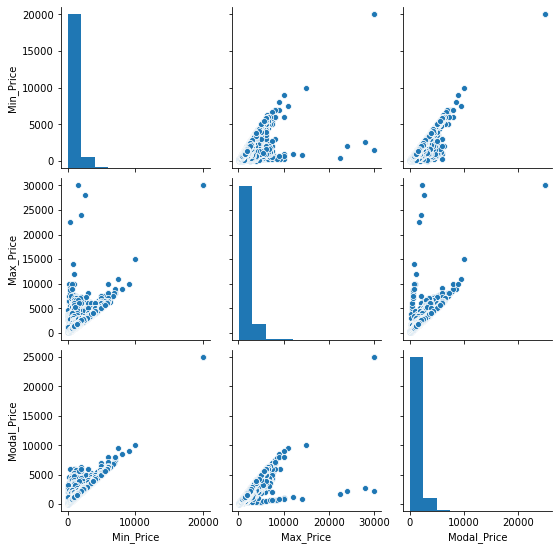

In [40]:
sns.pairplot(dataframe)

We can see that the Min & Max price both are positively correlating with the Modal price, this would be really helpful when we move onto our feature selection later.



We can identify unique districts & markets.

In [41]:
dataframe.District_Name.unique()

array(['Hassan', 'Chikmagalur', 'Kolar', 'Belgaum', 'Bellary',
       'Bangalore', 'Chamrajnagar', 'Davangere', 'Dharwad', 'Gadag',
       'Madikeri(Kodagu)', 'Haveri', 'Chitradurga', 'Mysore', 'Mandya',
       'Mangalore(Dakshin Kannad)', 'Shimoga', 'Raichur', 'Tumkur',
       'Udupi'], dtype=object)

In [42]:
dataframe.District_Name.nunique()

20

We have 20 different districts in Karnataka that sell tomatoes. Let us have a look at the the variability of each of these districts & how they panel out.

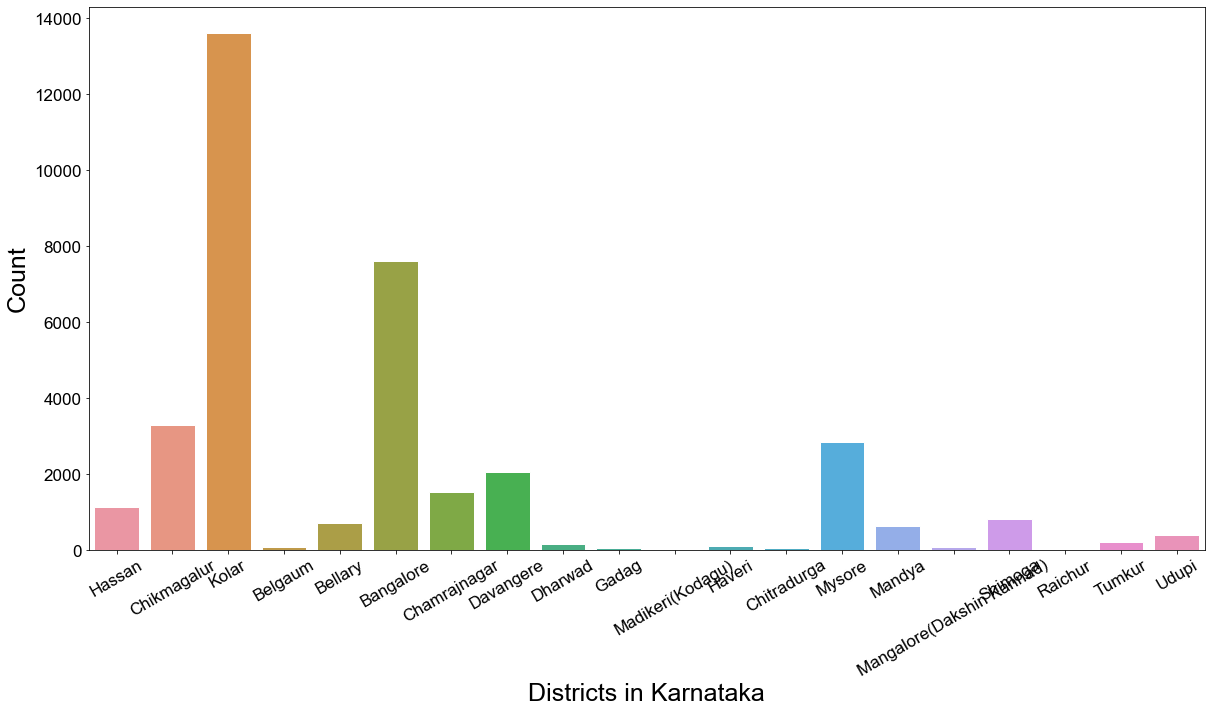

In [43]:
plt.figure(figsize = (20,10))
plt.xticks(rotation = 30 , fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style = "darkgrid")
sns.set_palette("pastel")
 
ax = sns.countplot(x="District_Name", data = dataframe)
ax.set_xlabel("Districts in Karnataka",fontsize = 25)
ax.set_ylabel("Count",fontsize = 25)

plt.show()

Kolar has almost 1400 entries of Tomato sales. With it being the highest, next comes Bangalore; at a significantly less count of near 8000. Rest of the Districts do not fair out as good as these two do , with them hovering around the 1000-2000 count mark

Let us observe the sales of the Tomatoes over the course of the 6 year period that our dataset has for each District.

We can do this in two ways , seeing monthly results & yearly results. For this , we would need to manupilate our dataframe a little. We need to extract the month & year. So let's do that

In [44]:
dataframe['Year'] = dataframe['Price_Date'].dt.year
dataframe['Month'] = dataframe['Price_Date'].dt.month

Let's plot a graph for Yearly sales for each district.

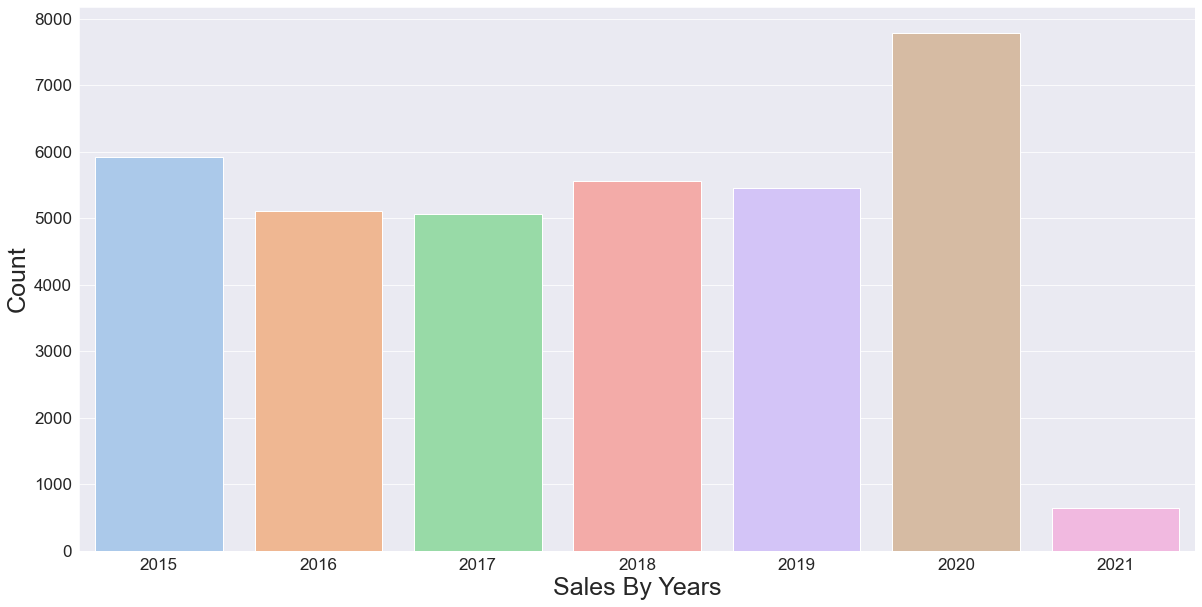

In [45]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style="darkgrid")
sns.set_palette("pastel")
 
ax = sns.countplot(x = 'Year' ,data = dataframe)
ax.set_xlabel("Sales By Years",fontsize=25)
ax.set_ylabel("Count",fontsize=25)
plt.show()

2020 seemed to have the highest sales for Tomatoes in Karnataka, despite of Lockdowns & Restrictions.

Let us have a look at monthly sales.

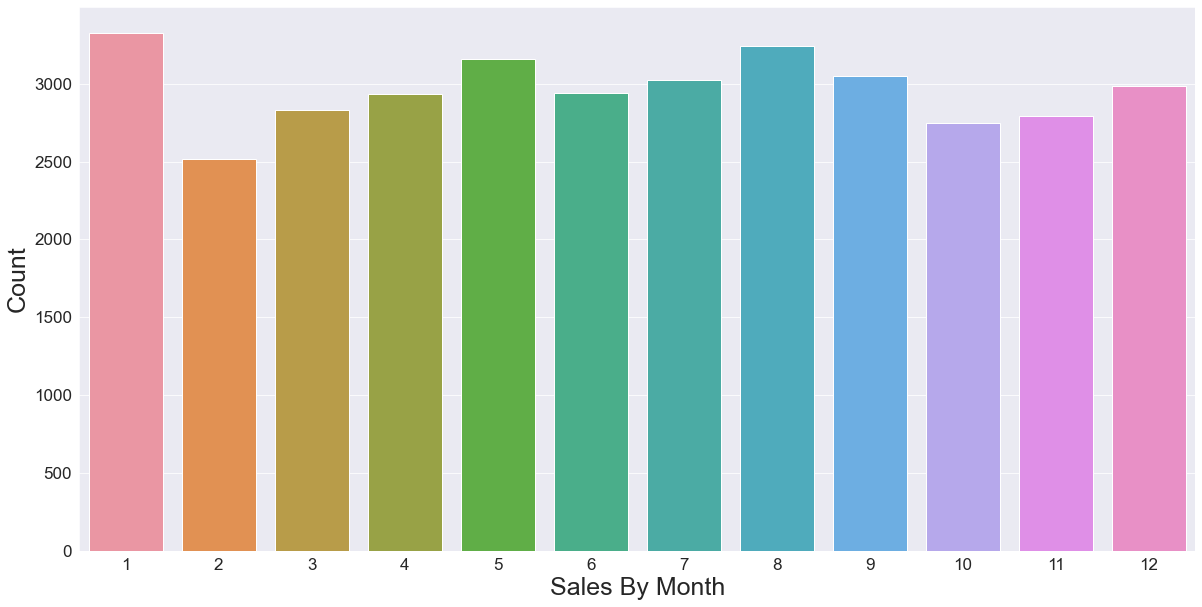

In [46]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style="darkgrid")
sns.set_palette("magma")
 
ax = sns.countplot(x = 'Month' ,data = dataframe)
ax.set_xlabel("Sales By Month",fontsize = 25)
ax.set_ylabel("Count",fontsize = 25)
plt.show()

Across all years , January had the most sales, with around 3,500

Now let us compare average Modal prices of Tomatoes for each Year

In [47]:
table = pd.pivot_table(dataframe, index = dataframe.Year)  #Using pivot method for easily parsing our dataframe

In [48]:
table.drop(columns = 'Month' , inplace = True)

In [49]:
table

,Max_Price,Min_Price,Modal_Price,Year
Year,,,,
2015,1394.485975,798.821223,1108.971274,2015
2016,1452.328501,819.942997,1173.190793,2016
2017,2080.541560,1084.691609,1633.527739,2017
2018,900.351565,468.996582,686.206909,2018
2019,1884.539813,940.853926,1406.129599,2019
2020,1634.545922,962.444188,1280.870649,2020
2021,1362.518462,826.752308,1088.050769,2021


We can see clearly each of the prices divided by each Year. Let us visualize it using graphs to better understand it.

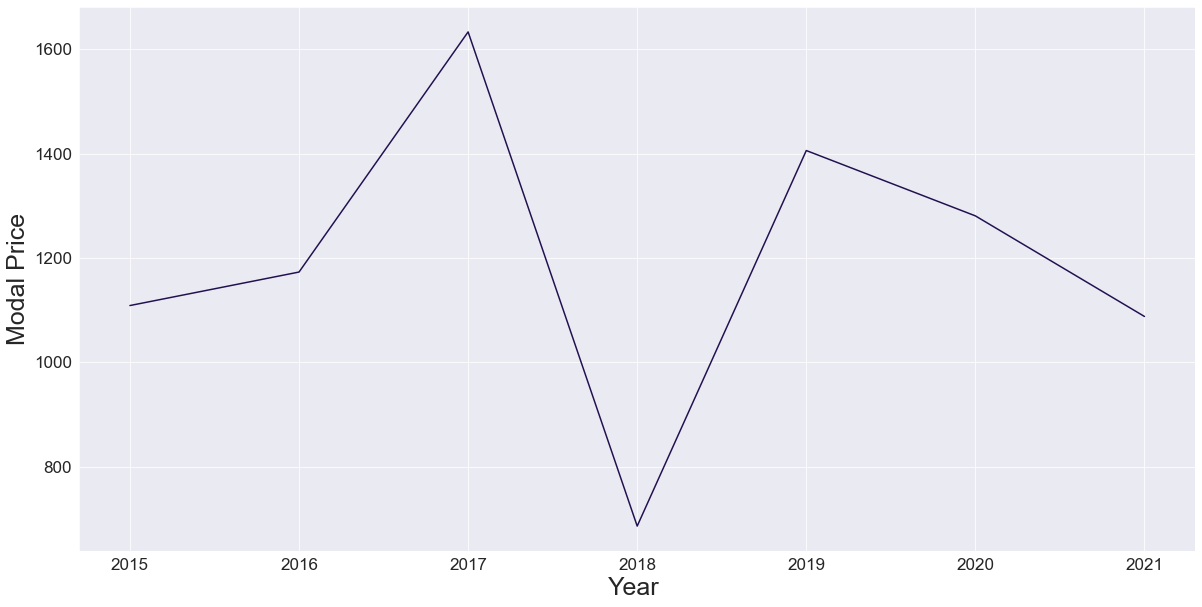

In [50]:
plt.figure(figsize = (20,10))
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style =  "darkgrid")
sns.set_palette("magma")
 
ax = sns.lineplot(x = table.index ,y = "Modal_Price",data = table)
ax.set_xlabel("Year ",fontsize = 25)
ax.set_ylabel("Modal Price",fontsize = 25)
plt.show()

As we can see , the modal price was at an all time high during 2017 & after that took a sharp dip in 2018 , then recovered in 2019

Let us look at it Monthwise & see if there is any trend there.

In [51]:
table = pd.pivot_table(dataframe, index = dataframe.Month)
table.drop(columns = 'Year' , inplace = True)
table

,Max_Price,Min_Price,Modal_Price
Month,,,
1,1365.209260,748.801263,1062.729104
2,964.554274,526.390457,747.115706
3,982.882998,521.781548,755.088017
4,1112.075716,622.472715,869.481583
5,1638.830906,955.432552,1316.695060
6,2085.400613,1209.240640,1674.479238
7,2389.695437,1301.672950,1876.177579
8,1609.416049,826.125926,1222.854630
9,1503.201378,800.782552,1150.452279


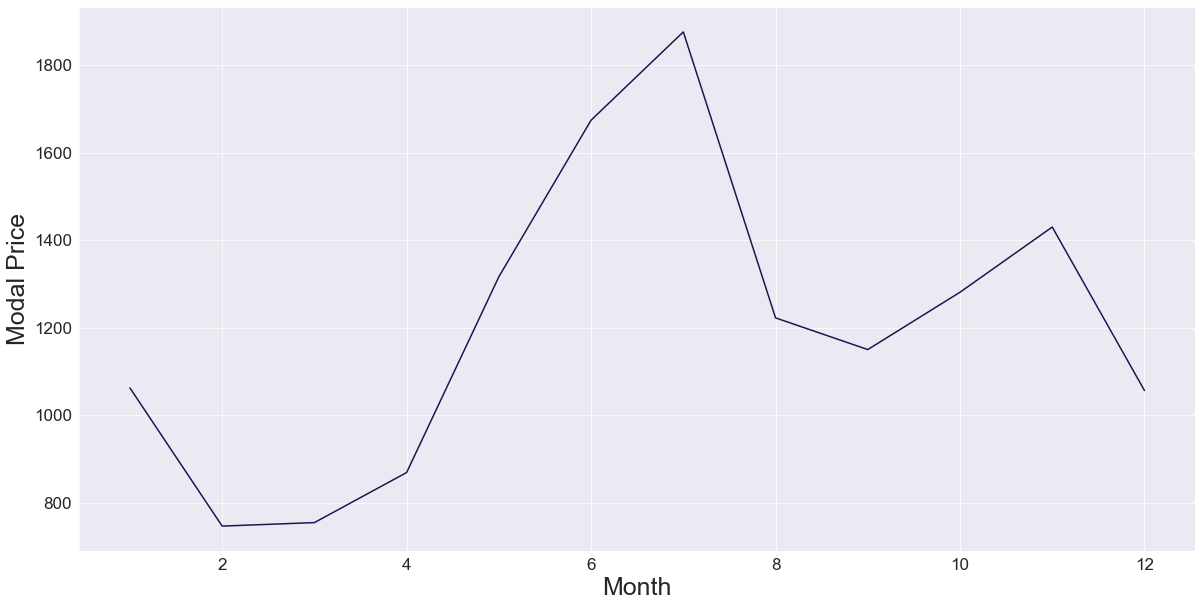

In [52]:
plt.figure(figsize=(20,10))
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style="darkgrid")
sns.set_palette("magma")
 
ax = sns.lineplot(x = table.index ,y = "Modal_Price",data = table)
ax.set_xlabel("Month",fontsize=25)
ax.set_ylabel("Modal Price",fontsize=25)
plt.show()

Looks like the Months of July & August always seem to reap lesser tomatoes , which is due to the fact of the higher pricing during these months. The price is the least around February which speak tells us that this is when there (would) be more sales in Tomatoes

Let us move onto the insights for the makets in Karnataka

In [53]:
markets = dataframe.Market_Name.unique()
print(len(markets))
markets

59


array(['Arasikere', 'Bagepalli', 'Bangarpet', 'Belgaum', 'Bellary',
       'Belur', 'Binny Mill (F&V), Bangalore', 'Chamaraj Nagar',
       'Channapatana', 'Channarayapatna', 'Chickkaballapura',
       'Chikkamagalore', 'Chintamani', 'Davangere', 'Dharwar',
       'Doddaballa Pur', 'Gadag', 'Gonikappal', 'Gowribidanoor',
       'Gundlupet', 'Hassan', 'Haveri', 'Hiriyur', 'Holalkere',
       'Holenarsipura', 'Honnali', 'Hoskote', 'Hospet',
       'Hubli (Amaragol)', 'Hunsur', 'K.R. Pet', 'K.R.Nagar', 'Kadur',
       'Kanakapura', 'Kolar', 'Kollegal', 'Koppa', 'Kudchi', 'Maddur',
       'Malur', 'Mangalore', 'Mulabagilu', 'Mysore (Bandipalya)',
       'Nagamangala', 'Nanjangud', 'Ramanagara', 'Ranebennur',
       'Sakaleshpura', 'Santhesargur', 'Shimoga', 'Sindhanur',
       'Somvarpet', 'Srinivasapur', 'T. Narasipura', 'Tarikere',
       'Thirthahalli', 'Tiptur', 'Tumkur', 'Udupi'], dtype=object)

With over 59 Markets in Karnataka , let us see which one belongs to which District

In [54]:
table = pd.pivot_table(dataframe, index = [dataframe.District_Name , dataframe.Market_Name])
table.drop(columns = ['Month', 'Year'] , inplace = True)

In [55]:
table

Max_Price  \
District_Name             Market_Name                                
Bangalore                 Binny Mill (F&V), Bangalore  1839.421813   
                          Channapatana                 1707.899023   
                          Doddaballa Pur               1450.976801   
                          Hoskote                      1599.184783   
                          Kanakapura                   1647.085137   
                          Ramanagara                   1690.180525   
Belgaum                   Belgaum                      3739.130435   
                          Kudchi                       4500.000000   
Bellary                   Bellary                       927.868852   
                          Hospet                        959.810030   
Chamrajnagar              Chamaraj Nagar                983.253205   
                          Gundlupet                    1208.675027   
                          Kollegal                     1000.000000   
Chikmagalur               Bagepalli                    1426.721491   
                          Chikkamagalore               1669.694566   
                          Kadur                        1540.894558   
                          Koppa                         952.000000   
                          Tarikere                      796.000000   
Chitradurga               Hiriyur                      1200.000000   
                          Holalkere                     877.704225   
Davangere                 Davangere                    1174.027882   
                          Honnali                      1074.068966   
Dharwad                   Dharwar                      1669.907407   
                          Hubli (Amaragol)              887.096774   
Gadag                     Gadag                        2993.965517   
Hassan                    Arasikere                    1571.230000   
                          Belur                        1363.478261   
                          Channarayapatna               881.804270   
                          Hassan                       1442.368827   
                          Holenarsipura                 900.000000   
                          Sakaleshpura                 1670.000000   
Haveri                    Haveri                       1533.653846   
                          Ranebennur                    798.083333   
Kolar                     Bangarpet                    1371.818507   
                          Chickkaballapura             1787.651110   
                          Chintamani                   1811.162668   
                          Gowribidanoor                 924.728261   
                          Kolar                        1799.073673   
                          Malur                        1809.465649   
                          Mulabagilu                   1770.764269   
                          Srinivasapur                 1734.817433   
Madikeri(Kodagu)          Gonikappal                   1000.000000   
                          Somvarpet                    1333.333333   
Mandya                    K.R. Pet                      425.589189   
                          Maddur                        400.000000   
                          Nagamangala                   657.924485   
Mangalore(Dakshin Kannad) Mangalore                    2235.555556   
Mysore                    Hunsur                       2364.551020   
                          K.R.Nagar                    1013.712831   
                          Mysore (Bandipalya)          1555.139466   
                          Nanjangud                    1378.057554   
                          Santhesargur                 1335.173913   
                          T. Narasipura                1515.429448   
Raichur                   Sindhanur                     616.666667   
Shimoga                   Shimoga                      1236.956522   
                          Thirthahalli                  956.603774 

This table gives us a very clear picture of the distributions of markets in Karnataka for each District

Let us look at the top 10 Modal prices in each of these markets. 59 of them would be too much to visualize

In [56]:
table[['Modal_Price']].idxmax() 

Modal_Price    (Belgaum, Kudchi)
dtype: object

In [57]:
top_ten_markets = table.nlargest(10 , 'Modal_Price')
top_ten_markets

Max_Price  \
District_Name             Market_Name                                
Belgaum                   Kudchi                       4500.000000   
                          Belgaum                      3739.130435   
Gadag                     Gadag                        2993.965517   
Mysore                    Hunsur                       2364.551020   
Mangalore(Dakshin Kannad) Mangalore                    2235.555556   
Udupi                     Udupi                        2036.259542   
Hassan                    Sakaleshpura                 1670.000000   
Bangalore                 Binny Mill (F&V), Bangalore  1839.421813   
Dharwad                   Dharwar                      1669.907407   
Bangalore                 Ramanagara                   1690.180525   

                                                         Min_Price  \
District_Name             Market_Name                                
Belgaum                   Kudchi                       3900.000000   
                          Belgaum                      2864.130435   
Gadag                     Gadag                        1894.827586   
Mysore                    Hunsur                       2164.285714   
Mangalore(Dakshin Kannad) Mangalore                    1711.111111   
Udupi                     Udupi                        1741.857506   
Hassan                    Sakaleshpura                 1670.000000   
Bangalore                 Binny Mill (F&V), Bangalore  1434.480946   
Dharwad                   Dharwar                      1361.111111   
Bangalore                 Ramanagara                   1340.371991   

                                                       Modal_Price  
District_Name             Market_Name                               
Belgaum                   Kudchi                       4100.000000  
                          Belgaum                      3385.869565  
Gadag                     Gadag                        2634.482759  
Mysore                    Hunsur                       2364.551020  
Mangalore(Dakshin Kannad) Mangalore                    1978.888889  
Udupi                     Udupi                        1893.002545  
Hassan                    Sakaleshpura                 1670.000000  
Bangalore                 Binny Mill (F&V), Bangalore  1643.561104  
Dharwad                   Dharwar                      1540.509259  
Bangalore                 Ramanagara                   1505.073851

Let us visualize this

In [58]:
top_ten_markets.index.get_level_values(1)

Index(['Kudchi', 'Belgaum', 'Gadag', 'Hunsur', 'Mangalore', 'Udupi',
       'Sakaleshpura', 'Binny Mill (F&V), Bangalore', 'Dharwar', 'Ramanagara'],
      dtype='object', name='Market_Name')

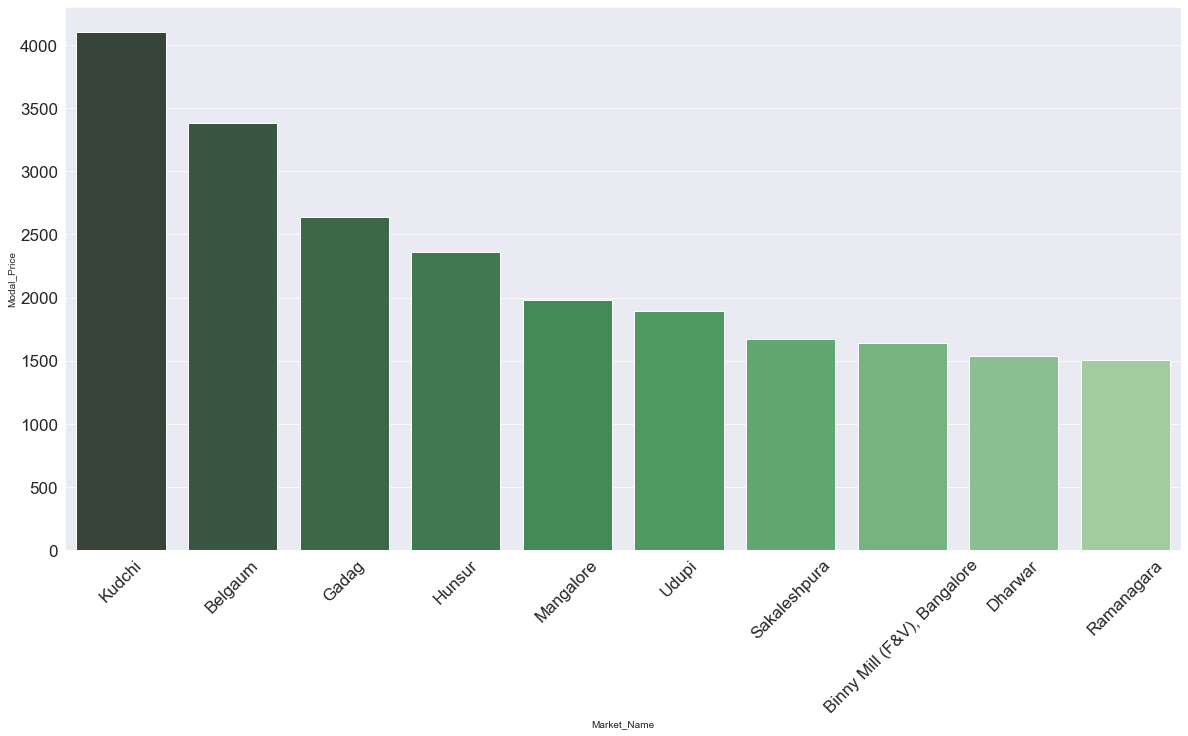

In [59]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45, fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style="darkgrid")
sns.set_palette("magma")
 
ax.set_xlabel("Month", fontsize=25)
ax.set_ylabel("Modal Price", fontsize=25)


sns.barplot(x=top_ten_markets.index.get_level_values(1),
            y = "Modal_Price" ,data=top_ten_markets, 
            palette="Greens_d")
plt.show()

As we see from this graph , Kudchi Market has the highest Modal Price at 4100 & subsequently follow the top 10 markets

Let us look at the varieties of Tomatoes which are in our dataset 

In [60]:
dataframe.Variety.unique()

array(['Tomato', 'Hybrid'], dtype=object)

We have two types , Tomato & Hybrid let us see how many of these exist in our dataset and see if we can gather any other insights from this

In [61]:
dataframe.Variety.value_counts()

Tomato    33816
Hybrid     1728
Name: Variety, dtype: int64

Almost 1,8500 Hybrid entries. Let us see how they vary from Tomatoes

In [62]:
varieties = dataframe.pivot_table(index="District_Name", columns='Variety', aggfunc='size', fill_value=0)
varieties

Variety,Hybrid,Tomato
District_Name,,
Bangalore,389,7226
Belgaum,1,92
Bellary,61,658
Chamrajnagar,7,1535
Chikmagalur,12,3284
Chitradurga,1,71
Davangere,38,2014
Dharwad,0,170
Gadag,1,57


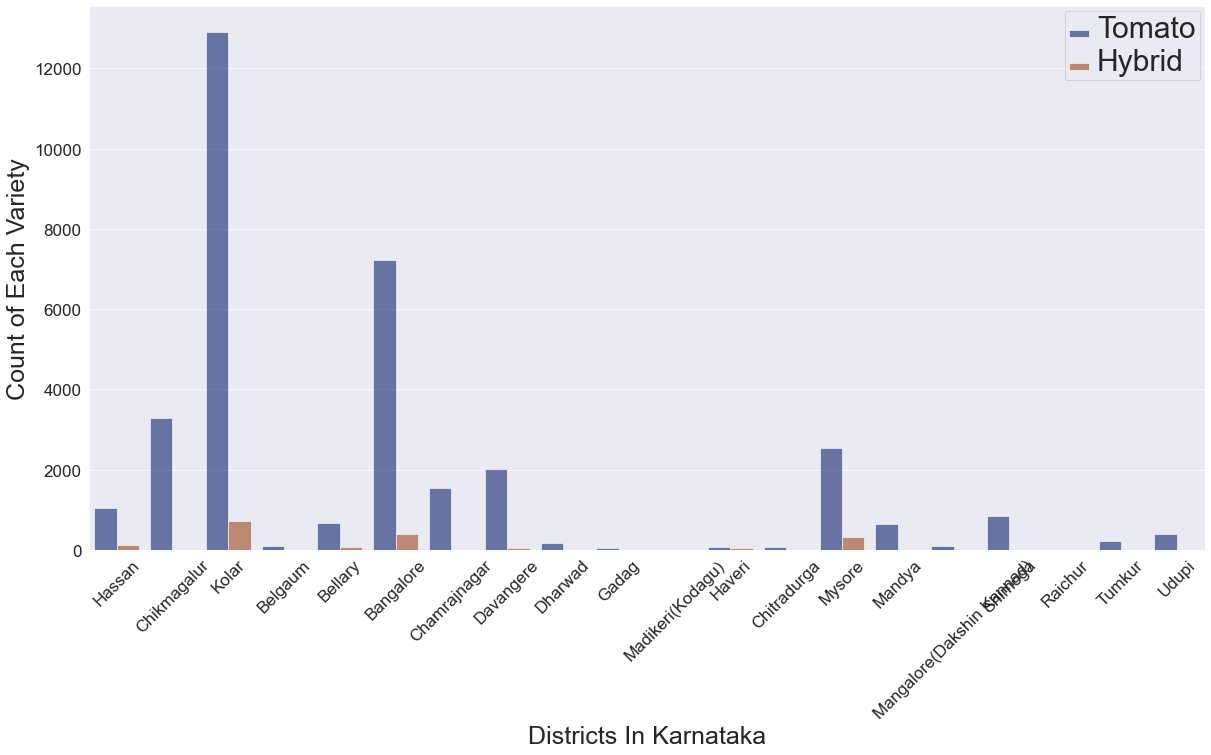

In [63]:
plt.figure(figsize=(20,10))
plt.xticks(rotation = 45 ,fontsize = 17)
plt.yticks(fontsize = 17)

sns.set_style(style="darkgrid")
sns.set_palette("magma")
 
ax = sns.countplot(
    data=dataframe,
    x="District_Name", hue="Variety",
     palette="dark", alpha=.6)

ax.set_xlabel("Districts In Karnataka",fontsize=25)
ax.set_ylabel("Count of Each Variety",fontsize=25)


plt.legend(loc='upper right')
plt.setp(ax.get_legend().get_texts(), fontsize='30')     
# for legend title 
plt.setp(ax.get_legend().get_title(), fontsize='30')

plt.show()

Almost negligible comparisons to Tomatoes for Hybrid for each District

Let us see the average prices for Tomatoes & Hybrids

In [64]:
tomato_df = dataframe.query('Variety == "Tomato"')
tomato_mean = tomato_df['Modal_Price'].mean()

In [65]:
hybrid_df = dataframe.query('Variety == "Hybrid"')
hybrid_mean = hybrid_df['Modal_Price'].mean()

Now , let us plot these Values on a graph

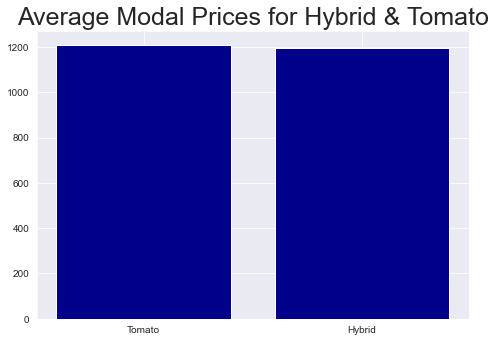

In [66]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
variety_row = ['Tomato' , 
              'Hybrid']
variety_col = [tomato_mean , hybrid_mean]

ax.bar(variety_row,variety_col , color = 'darkblue')

ax.set_title('Average Modal Prices for Hybrid & Tomato' , fontsize = 25)
ax.set_xticks(['Tomato' , 'Hybrid'] )

#ax.legend(labels=['Men', 'Women'])

plt.show()

Let us look at the varieties of the Grade 

In [67]:
dataframe['Grade'].unique()

array(['FAQ', 'Medium', 'Small', 'Large'], dtype=object)

In [68]:
dataframe['Grade'].value_counts()

FAQ       34380
Medium     1069
Small        80
Large        15
Name: Grade, dtype: int64

Large & Small values are almost negligible comparing to the total dataset size